In [1]:
#Programa que implementa computacionalmente a wavelet de Ricker, Ormsby e Butterworth
from scipy import signal
import numpy as np 
import matplotlib.pyplot as plt

In [92]:
def Ricker_Wavelet(Peak_freq, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    ricker = (1. -2.*(np.pi**2)*(Peak_freq**2)*(t**2))*np.exp(-(np.pi**2)*(Peak_freq**2)*(t**2))
    return t, ricker

def Ormsby_Wavelet(f,Samples, Dt):
    assert len(f) == 4, 'Ormsby wavelet needs 4 frequencies as input'
    f = np.sort(f) #Ormsby wavelet frequencies must be in increasing order
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    #t = np.linspace(-Duration,Duration,int(Duration/Sampling))
    pif   = np.pi*f
    den1  = pif[3] - pif[2]
    den2  = pif[1] - pif[0]
    term1 = (pif[3]*np.sinc(f[3]*t))**2 - (pif[2]*np.sinc(f[2]*t))**2
    term2 = (pif[1]*np.sinc(f[1]*t))**2 - (pif[0]*np.sinc(f[0]*t))**2

    wav   = term1/den1 - term2/den2;
    wav /= np.amax(wav)
    return t, wav

def Butter_Wavelet(Freq_hi, Freq_low, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    imp = signal.unit_impulse(t.shape[0], 'mid')
    b, a = signal.butter(4, Freq_hi,fs = 1000*(1/Dt))
    response_zp = signal.filtfilt(b, a, imp)
    low_b, low_a = signal.butter(2,Freq_low,'hp', fs = 1000*(1/Dt))
    butter_wvlt = signal.filtfilt(low_b, low_a, response_zp)
    return t, butter_wvlt
    

In [93]:
lenght = 50
Freq_domin = 40
dt = 4
Time , Ricker_wl = Ricker_Wavelet(Freq_domin,lenght,dt)
#Ricker wavelet spectrum
freqs = np.fft.rfftfreq(Time.shape[0], d=dt/1000)
a = np.fft.rfft(Ricker_wl)
A = np.abs(a)

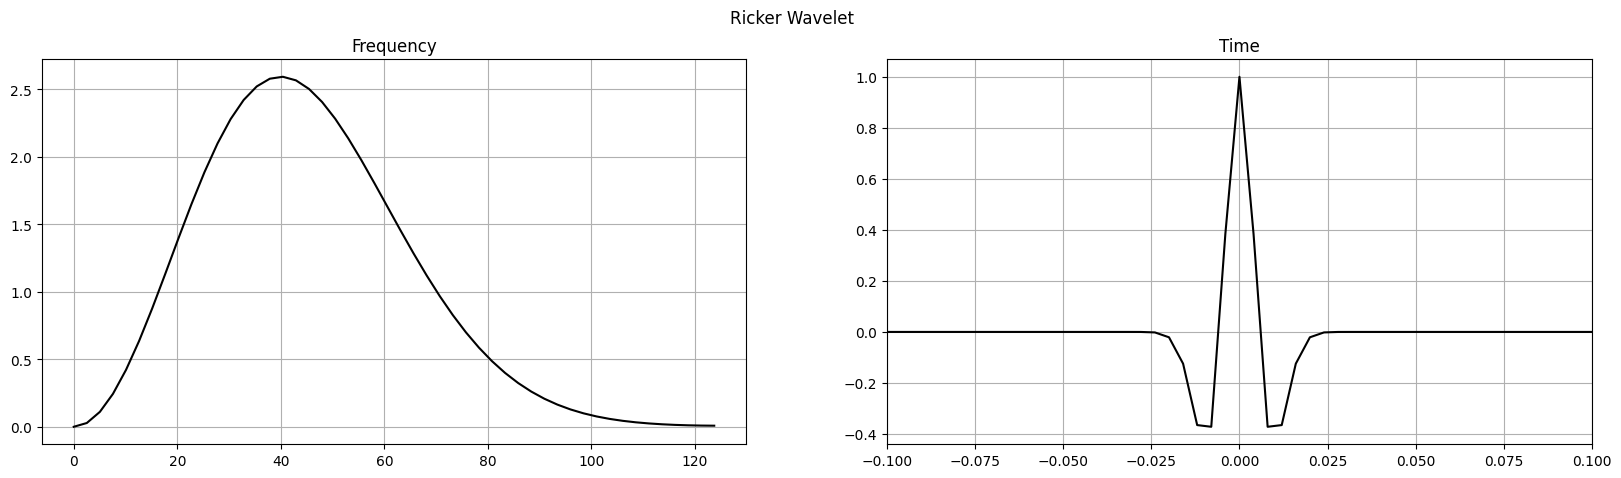

In [94]:
# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ricker Wavelet')
axs[0].plot(freqs, A, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(Time, Ricker_wl, 'k')
axs[1].set_xlim(-0.1,0.1)
axs[1].grid()
axs[1].set_title('Time')

plt.show()

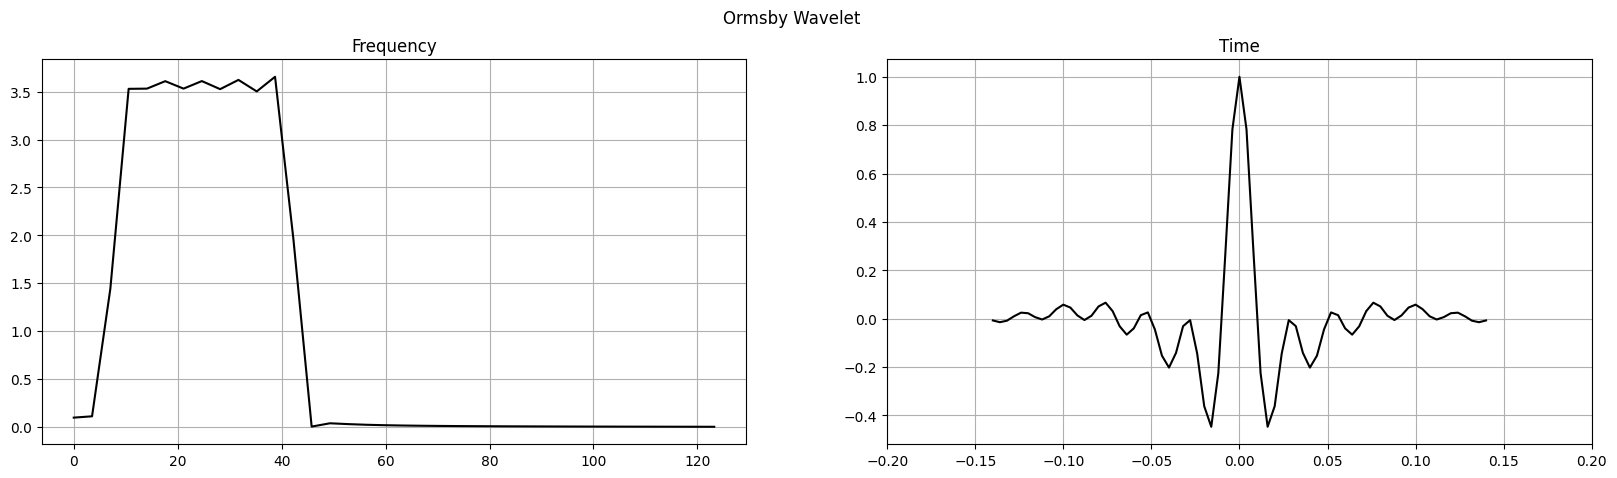

In [95]:
time, wvlt = Ormsby_Wavelet((5,10,40,45),36,4)

orms_fft = abs(np.fft.rfft(wvlt))
freqs = np.fft.rfftfreq(time.shape[0], d=dt/1000)

# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ormsby Wavelet')
axs[0].plot(freqs, orms_fft, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(time, wvlt, 'k')
axs[1].set_xlim(-0.2,0.2)
axs[1].grid()
axs[1].set_title('Time')
plt.show()

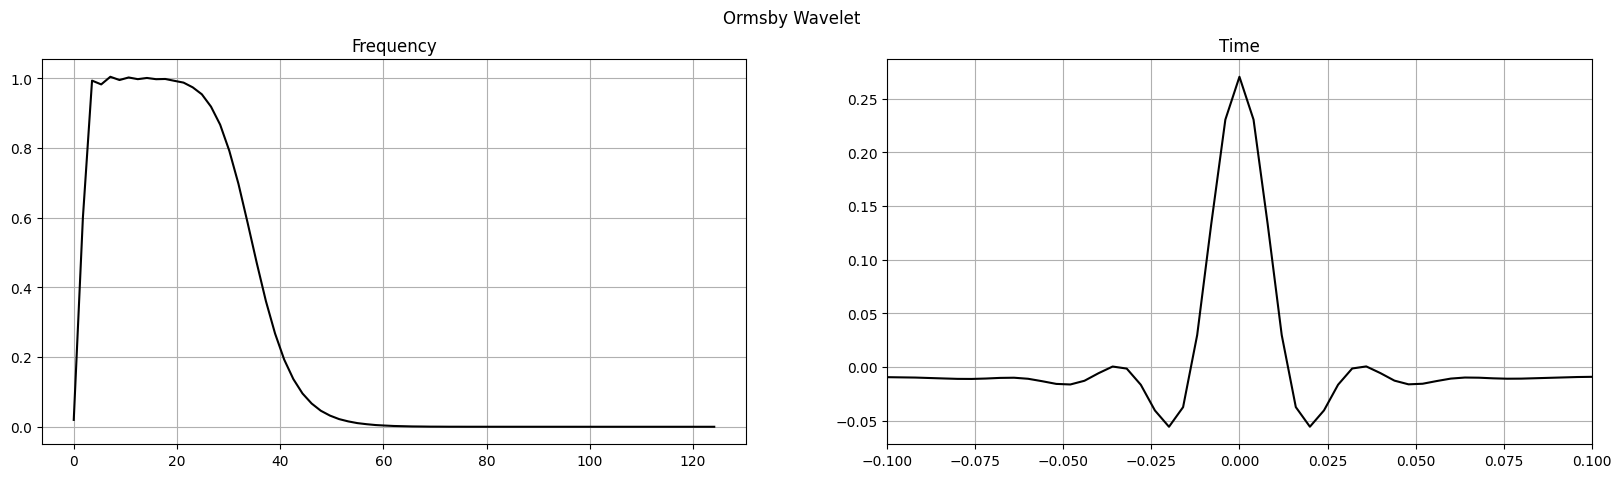

In [96]:
Samples = 71
Dt = 4
t, butter_wvlt = Butter_Wavelet(35, 1.5, Samples, Dt)

butter_fft = abs(np.fft.rfft(butter_wvlt))
freqs = np.fft.rfftfreq(t.shape[0], d=Dt/1000)


# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Ormsby Wavelet')
axs[0].plot(freqs, butter_fft, 'k')
axs[0].grid()
axs[0].set_title('Frequency')
axs[1].plot(t,butter_wvlt, 'k')
axs[1].set_xlim(-0.1,0.1)
axs[1].grid()
axs[1].set_title('Time')
plt.show()
